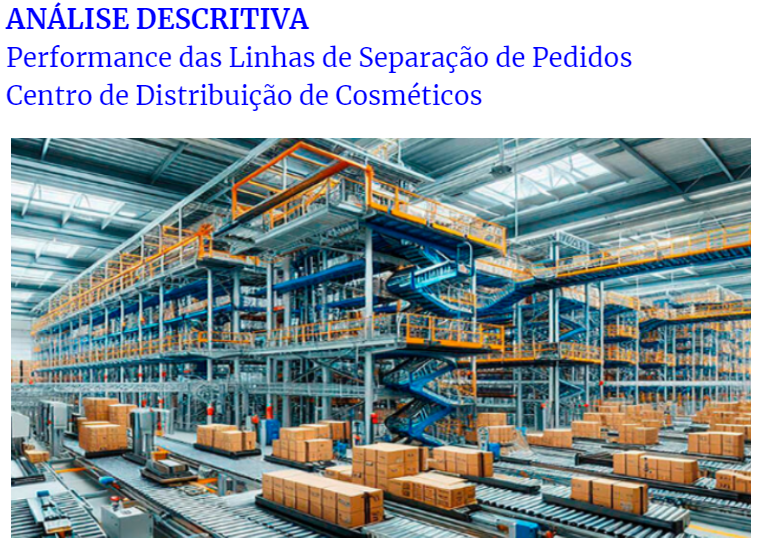


### Entendendo o Contexto.
<br> 
<div style="text-align: justify">
O Centro de Distribuição New Cosmetic, inaugurado em 2023, distribui produtos para todos os estados do Nordeste. Possui seis linhas automatizadas usando a tecnologia Pick to Light, cada uma dedicada a uma categoria específica de produtos: condicionador, hidratante facial, máscara de hidratação, óleo capilar, protetor solar e shampoos.
</div>

<br> 

<div style="text-align: justify">
No primeiro ano de operação, a expectativa era atingir uma média de 1.685 peças separadas por hora para cada categoria de produtos. No entanto, o levantamento de produtividade de Janeiro a outubro de 2023 revelou uma média real de 1.595 peças por hora por categoria, abaixo da meta ideal. Apesar de superar a meta mínima de 1.500 peças por hora, a produtividade média de 1.594 peças por hora gerou alerta por parte da direção, pois ficou aquém das expectativas.
</div>



### O Problema Logístico.
<br> 
<div style="text-align: justify">
O Centro de Distribuição enfrenta um desafio devido à diferença entre a expectativa da direção de atingir uma média de 1.685 peças separadas por hora para cada categoria de produtos e a média real de 1.594 peças por hora observada de Janeiro a Outubro de 2023. O foco agora é identificar as categorias ou linhas que estão contribuindo para essa baixa produtividade.
</div>

### Relevância do Problema Logístico.
<br> 
<div style="text-align: justify">
A baixa produtividade das linhas de separação afeta a eficiência operacional do Centro de Distribuição, podendo prejudicar sua capacidade de atender à demanda do mercado. É crucial compreender e corrigir as razões por trás dessa discrepância para garantir a satisfação dos clientes e atingir as metas estabelecidas pela direção.
</div>


### Propósito e Expectativas da Análise Descritiva dos Dados.
<br> 
<div style="text-align: justify">
O propósito da análise descritiva é identificar padrões e variações na produtividade das seis linhas de separação, buscando compreender melhor as razões por trás da média real de 1.594 peças por hora. O objetivo é fornecer insights acionáveis para aprimorar a eficiência operacional.
</div><br> 
Por meio dessa análise, espera-se identificar categorias ou linhas específicas abaixo da meta estabelecida e compreender os fatores que contribuem para a baixa produtividade. Esses insights críticos serão entregues à direção, embasando decisões estratégicas para otimizar a eficiência global do Centro de Distribuição.
</div>

### Instalando os Pacotes para as Análises dos Dados Logísticos.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



In [2]:
# Versões dos pacotes usados neste jupyter notebook.
%reload_ext watermark
%watermark -a "Marcus lopes" 

Author: Marcus lopes



### Carregando o DataFrame com os Dados Logísticos - Separação de Peças por Hora.

In [3]:
# Código para carregar o dataset de produtividade das linhas de separação.
dfprod = pd.read_csv("C:\Arquivos\PRODUTIVIDADE_CD23.csv",encoding = "ISO-8859-1")


### Compreendendo os Dados Logísticos - Separação de Peças por Hora.

In [4]:
# Código para mostrar a quantidade de linhas e colunas do dataframe.
dfprod.shape

# Temos 21.840 linhas e 07 colunas.

(21840, 7)

In [5]:
# Código para contar o número de valores nulos (NaN) em cada coluna do dataFrame.
dfprod.isna().sum()

# Não temos nenhum valor nulo.

data_sep         0
mes              0
hora_sep         0
turno_sep        0
linha_sep        0
categoria        0
produtividade    0
dtype: int64

In [6]:
# Código para verificar as primeiras 05 linhas do dataframe.
dfprod.head()


,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
0,02/01/2023,jan,06:00-07:00,primeiro_turno,linha_01,shampoos,1249
1,02/01/2023,jan,07:00-08:00,primeiro_turno,linha_01,shampoos,2849
2,02/01/2023,jan,08:00-09:00,primeiro_turno,linha_01,shampoos,823
3,02/01/2023,jan,09:00-10:00,primeiro_turno,linha_01,shampoos,2478
4,02/01/2023,jan,10:00-11:00,primeiro_turno,linha_01,shampoos,1030


In [7]:
# Código para verificar as 05 últimas linhas do dataframe.
dfprod.tail()


,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar,1625
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar,1033
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar,1826
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar,796
21839,31/10/2023,out,21:00-22:00,segundo_turno,linha_06,protetor_solar,957


In [8]:
# código para fornecer informações concisas sobre um dataFrame.
dfprod.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21840 entries, 0 to 21839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_sep       21840 non-null  object
 1   mes            21840 non-null  object
 2   hora_sep       21840 non-null  object
 3   turno_sep      21840 non-null  object
 4   linha_sep      21840 non-null  object
 5   categoria      21840 non-null  object
 6   produtividade  21840 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [9]:
# Código para gerar as estatísticas descritivas para as colunas numéricas int64 (inteiros) do dataFrame.

dfprod.describe()

# Temos count =  quantidade de linhas,
# mean =  Média da separação de peças/h.
# min = Indica o valor minimo que foi alcabçado na separação de peças/h.
# std =  Desvio padrão separação de peças/h
# Primeiro quartil =  25 %  da separação de peças/h estão abaixo desse valor.
# Segundo Quartil = Mediana = 50%  da separação de peças/h estão abaixo desse valor.
# Terceiro Quartil = 75% da separação de peças/h estã abaixo dessa valor.
# Valor máximo = Indica o valor máximo que foi alcabçado na separação de peças/h.


,produtividade
count,21840.000000
mean,1595.212225
std,608.726098
min,600.000000
25%,1110.750000
50%,1401.000000
75%,2051.000000
max,3000.000000


In [10]:
# Código para retornar o número total de linhas duplicadas no dataFrame.

dfprod.duplicated().sum()

# Não temos no dataframe nenhuma linha duplicada.

0

In [11]:
# Códifo paa Informar as colunas (variaveis) do Dataset.
dfprod.columns

Index(['data_sep', 'mes', 'hora_sep', 'turno_sep', 'linha_sep', 'categoria',
       'produtividade'],
      dtype='object')

In [12]:
# Códido para cria um dicionário com a descrição de cada variável (colunas).
cd_df_dict = {
    "data_sep": "Variável que representa a data de separação das peças.",
    "mes": "Variável que representa o mês em que a separação foi realizada.",
    "hora_sep": "Variável que representa o mês em que a separação foi realizada.",
    "turno_sep": "Variável que representa o turno em que a separação foi realizada.",
    "linha_sep": "Variável que representa a Linha em que a separação foi realizada.",
    "categoria": "Variável que representa a categoria de cada produto separado.",
    "produtividade": "Variável que representa a quantidade de peças separadas.",
    
}

In [13]:
cd_df_dict['mes']

'Variável que representa o mês em que a separação foi realizada.'

# <font color='blue'>Respondendo às Perguntas de Negócios- Fase 01</font>

 ### 01- Qual é a distribuição da separação de peças por hora no Centro de Distribuição New Cosmetic?

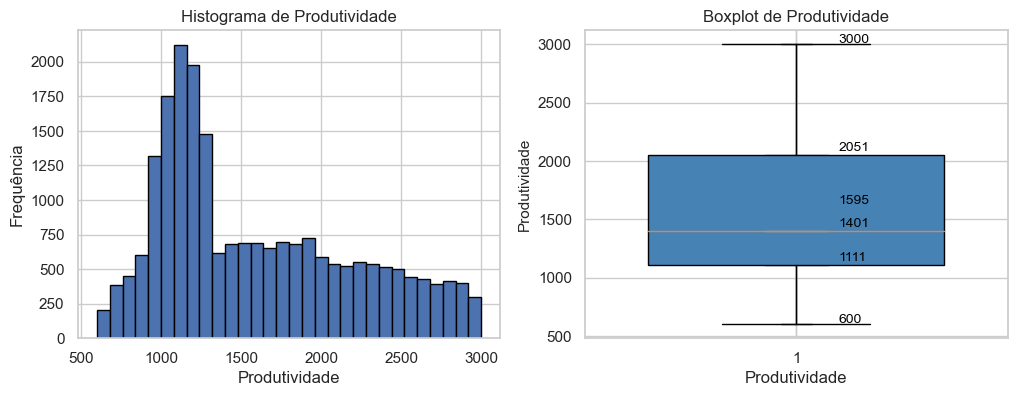

In [36]:
# Código para criar o gráfico de Histograma e Bloxplot.

import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_boxplot(dfprod):
    # Criar histograma e boxplot na mesma linha
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    dfprod["produtividade"].hist(bins=30, edgecolor='black', ax=ax1)
    ax1.set_title('Histograma de Produtividade', fontsize=12)
    ax1.set_xlabel('Produtividade', fontsize=12)
    ax1.set_ylabel('Frequência', fontsize=12)
    
    # Configurar o estilo Seaborn
    sns.set(style="whitegrid")

    # Boxplot
    bp = dfprod.boxplot(column='produtividade', ax=ax2)
    ax2.set_title('Boxplot de Produtividade', fontsize=12)
    ax2.set_xlabel('Produtividade', fontsize=12)
    ax2.set_ylabel('Produtividade', fontsize=11)

    # Criar boxplot com cor nas caixas internas e aumentar a caixa
    bp = ax2.boxplot(dfprod["produtividade"], patch_artist=True, widths=0.7)
    bp['boxes'][0].set_facecolor('steelblue') # Definir cor das caixas internas

    # Calcular estatísticas descritivas
    estatisticas = dfprod["produtividade"].describe()

    # Adicionar valores ao boxplot
    for statistic, label, alignment in zip(['50%', 'mean', '25%', '75%', 'min', 'max'],
                                           ['Mediana', 'Média', 'Q1', 'Q3', 'Mínimo', 'Máximo'],
                                           ['bottom', 'bottom', 'bottom', 'bottom', 'baseline', 'baseline']):
        plt.text(1.1, estatisticas[statistic] + 10, f'{estatisticas[statistic]:.0f}',
                 color='black', fontsize=10, verticalalignment=alignment)

    # Adicionar outliers se houver
    outliers = bp['fliers'][0].get_ydata()
    plt.scatter([1] * len(outliers), outliers, marker='o', color='red', alpha=0.7, label='Outliers')
    
    # Configurar o estilo Seaborn
    sns.set(style="whitegrid")

    plt.show()

# Chamar a função
plot_histogram_boxplot(dfprod)


**Análise do resultado Histograma.**
    
A distribuição varia entre 600 peças por hora, como produção mínima e 3.000 peças por hora como produção máxima.

**Análise do resultado do Boxplot.**

**Mínimo (600 peças):** Este é o menor valor de produção registrado em uma hora para um tipo de produto específico.

**1º Quartil (1.111 peças):** Cerca de 25% da produção fica abaixo desse valor.

**Mediana (1.401 peças):** Metade da produção está acima desse valor e a outra metade está abaixo.

**Média (1.595 peças ):** Esta é a média de peças separadas por hora para todas as categorias de produtos.

**3º Quartil (2.501):** Cerca de 75% da produção está abaixo desse valor. Isso mostra onde a maior parte da produção se concentra.

**Máximo (3000):** Este é o valor mais alto de produção registrado em uma hora para um tipo de produto específico.


**Cálculo da assimetria, ou skew:**

<div style="text-align: justify">
A medida de assimetria, também conhecida como skewness, quantifica o grau de assimetria ou falta de simetria em uma distribuição. Ela indica se a cauda da distribuição está inclinada para a esquerda, para a direita ou se está aproximadamente simétrica.
</div><br>

* **Skewness > 0:** Assimetria à direita (cauda longa à direita).
* **Skewness < 0:** Assimetria à esquerda (cauda longa à esquerda).
* **Skewness = 0:** Distribuição simétrica.

In [15]:
# código para calcular a assimetria, ou "skew".

dfprod["produtividade"].skew() 

0.6186678014975286

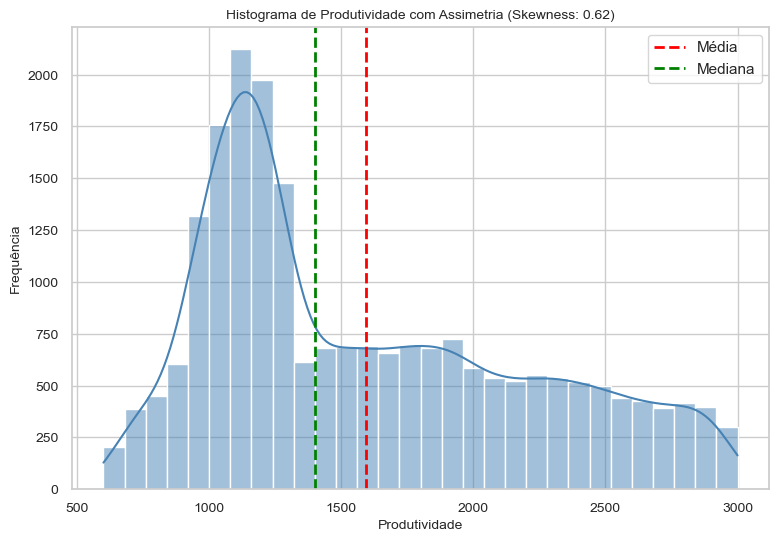

In [37]:
# Gráfico o Gráfico da assimetria, ou "skew".

import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_with_skewness(df):
    # Configurar os tamanhos padrão da fonte
    plt.rc('font', size=10)          # Tamanho geral da fonte
    plt.rc('axes', titlesize=10)      # Tamanho da fonte do título dos eixos
    plt.rc('axes', labelsize=10)      # Tamanho da fonte das etiquetas dos eixos
    plt.rc('xtick', labelsize=10)     # Tamanho da fonte dos rótulos do eixo x
    plt.rc('ytick', labelsize=10)     # Tamanho da fonte dos rótulos do eixo y
    plt.rc('legend', fontsize=10)     # Tamanho da fonte da legenda
    plt.rc('figure', titlesize=10)    # Tamanho da fonte do título da figura

    # Calcular a assimetria (skewness) e a mediana
    skewness = dfprod["produtividade"].skew()
    mediana = dfprod["produtividade"].median()

    # Configurar o tamanho da figura
    plt.figure(figsize=(9, 6))

    # Criar um histograma
    sns.histplot(dfprod["produtividade"], bins=30, kde=True, color='steelblue')

    # Adicionar linhas verticais para a média e a mediana
    plt.axvline(dfprod["produtividade"].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
    plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label='Mediana')

    # Adicionar rótulos aos eixos e título
    plt.xlabel('Produtividade')
    plt.ylabel('Frequência')
    plt.title(f'Histograma de Produtividade com Assimetria (Skewness: {skewness:.2f})')
    
    # Configurar o estilo Seaborn
    sns.set(style="white")

    # Adicionar legenda
    plt.legend()

    # Exibir o gráfico
    plt.show()

# Chamar a função
plot_histogram_with_skewness(dfprod)

**Análise do resultado da Skew (Assimetria):**

<br>

<div style="text-align: justify">
Um coeficiente de assimetria (skewness) de 0,6186678014975286 indica que a distribuição dos dados, separação de peças por hora é assimetria à direita. Conforme podemos olhar no gráfico Histograma de produtibidade assimetria.
</div><br>

<div style="text-align: justify">
Isso significa que a maioria dos valores estão concentrada no lado esquerdo da distribuição, com uma cauda longa no lado direito. Com uma mediana de 1.401 peças separadas por hora, indica que a metade dos valores é menor ou igual a 1.401 e a outra metade é maior ou igual a 1.401 peças separadas por hora.
</div><br>

### 02- Há variação na quantidade de peças separadas por hora em diferentes turnos de trabalho?

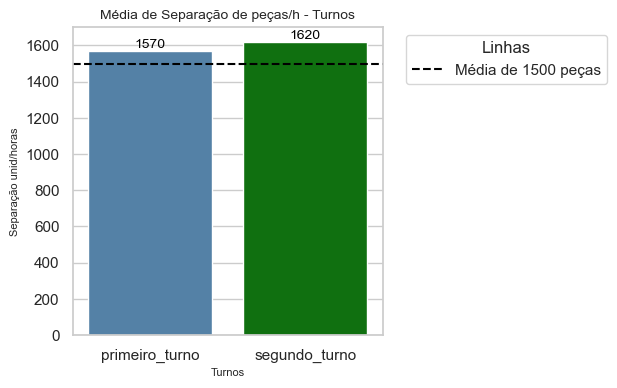

In [38]:
# Código para gerar os graficos comparando a produtividade entre turnos.

import seaborn as sns
import matplotlib.pyplot as plt

def plot_mean_productivity_by_shift(df):
    # Calcular as médias por turno e renomear a coluna
    df_media_turno = dfprod.groupby(["turno_sep"])["produtividade"].mean().reset_index()
    dfturnos = df_media_turno.rename(columns={'produtividade': 'Media_produtividade_turno'})

    # Criar uma lista de cores para cada turno_sep
    cores = ['steelblue', 'green']  # Adicione mais cores conforme necessário

    # Configurar o estilo Seaborn
    sns.set(style="whitegrid")

    # Criar o gráfico de barras com tamanho ajustado usando Seaborn
    plt.figure(figsize=(4, 4))
    ax = sns.barplot(x="turno_sep", y="Media_produtividade_turno", data=dfturnos, palette=cores)

    # Adicionar uma linha horizontal para a média de 1500 peças
    plt.axhline(y=1500, color='black', linestyle='--', label='Média de 1500 peças')

    # Adicionar rótulos e título com tamanho de letra aumentado
    plt.xlabel('Turnos', fontsize=8)
    plt.ylabel('Separação unid/horas', fontsize=8)
    plt.title('Média de Separação de peças/h - Turnos', fontsize=10)

    # Adicionar os valores no topo das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', color='black', fontsize=10)

    # Remover as bordas
    sns.despine(left=True, right=True, top=True, bottom=True)

    # Adicionar legenda ao lado
    plt.legend(title='Linhas', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adicionar bordas
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    # Exibir o gráfico
    plt.show()

# Chamar a função
plot_mean_productivity_by_shift(dfprod)

### 03- Existem horas específicas com maior ou menor separação de peças?
### 04- Há evidências significativas na variação de peças separadas por hora ao longo dos meses?


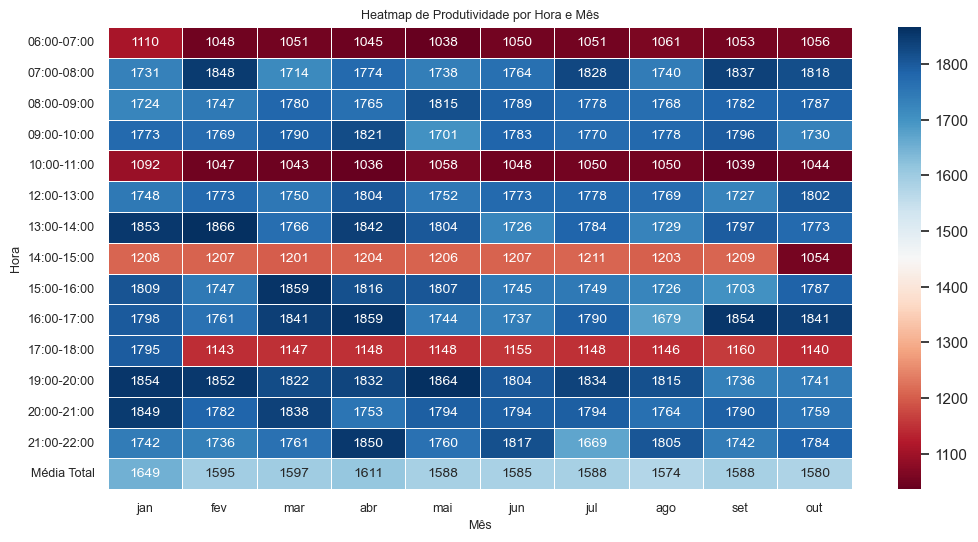

In [39]:
# Código para construção do gráfico de heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_productivity_heatmap(df):
    # Calcular as médias por turno e renomear a coluna
    dfmes = dfprod.groupby(["hora_sep", "mes"])["produtividade"].mean().reset_index()

    # Definindo a ordem dos meses
    ordem_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']

    # Criar uma tabela pivô para preparar os dados para o mapa de calor
    heatmap_data = dfmes.pivot(index='hora_sep', columns='mes', values='produtividade')

    # Reordenar as colunas de acordo com a ordem dos meses
    heatmap_data = heatmap_data.reindex(columns=ordem_meses)

    # Preencher os valores não finitos com zero
    heatmap_data = heatmap_data.fillna(0)

    # Arredondar e converter para inteiros
    heatmap_data = heatmap_data.round().astype('int')

    # Calcular a média total de cada coluna
    media_total = heatmap_data.mean()

    # Adicionar a média total ao final de cada coluna
    heatmap_data.loc['Média Total'] = media_total

    # Criar o heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt=".0f", linewidths=.5, annot_kws={"fontsize":10})

    # Adicionar rótulos e título com tamanho de letra aumentado
    plt.xlabel('Mês', fontsize=9)
    plt.ylabel('Hora', fontsize=9)
    plt.title('Heatmap de Produtividade por Hora e Mês', fontsize=9)

    # Ajustar tamanho da fonte das marcações no eixo x
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)

    plt.show()

# Chamar a função
plot_productivity_heatmap(dfprod)


**Análise do Heatmap - 06:00 as 14:00 - 1ªTurno**

**Variação ao Longo das Horas - Aumento de Produtividade:** Observamos que entre as **06:00 e 07:00 horas**, que corresponde ao início do turno, a produtividade é baixa. Entretanto, ocorre um aumento significativo das **07:00 às 08:00 horas**, atingindo o pico de 1.778 peças. Isso sugere uma possível fase mais eficiente ou otimizada do processo durante esse período.

**Consistência ao Longo das Horas - Estabilização da Produtividade:** Entre as **07:00 e 10:00 horas**, notamos que a produtividade permanece relativamente consistente, oscilando em torno de 1.770 peças por hora. Isso indica uma estabilidade na produção durante essa parte do turno.

**Variação ao Longo das Horas - Queda de Produtividade:** Já entre as **10:00 e 11:00 horas**, observamos uma queda na produtividade para uma média de 1.051 peças, indicando uma diminuição acentuada nesse período específico. Essa queda pode demandar uma análise mais detalhada para compreender as possíveis razões desse declínio.


**Análise do Heatmap - 14:00 às 22:00 - 2º Turno**

**Variação Horária - Aumento de Produtividade:** Entre as **14:00 e 15:00 horas**, período correspondente ao início do turno, observamos uma produtividade baixa. No entanto, há um aumento significativo das 15:00 às 16:00 horas, atingindo o pico de 1.775 peças. Isso sugere uma possível fase mais eficiente ou otimizada no processo durante esse intervalo.

**Consistência Horária - Estabilização da Produtividade:** Entre as **15:00 e 17:00 horas**, a produtividade se mantém relativamente consistente, oscilando em torno de 1.782 peças por hora. Essa estabilidade indica uma produção regular durante essa parte do turno.

**Variação Horária - Queda de Produtividade:** Já entre as **17:00 e 18:00 horas**, observamos uma queda na produtividade para 1.051 peças, indicando um declínio acentuado nesse horário específico. Isso sugere a necessidade de uma análise mais detalhada para compreender as possíveis razões desse decréscimo.

**Consistência Horária - Estabilização da Produtividade:** Entre as 19:00 e 22:00 horas,a produtividade se mantém relativamente consistente. Essa estabilidade indica uma produção regular durante essa parte do turno.


**Análise dos Meses - Produtividade**

<br> 
<div style="text-align: justify">
A análise da média de separação de peças de todas as linhas ao longo dos meses revela uma tendência de estabilidade, com variações moderadas em torno de um valor médio. As médias mensais variam de 1565 a 1649 peças por hora, indicando uma certa consistência no desempenho ao longo do tempo. Não há uma tendência clara de aumento ou diminuição durante o período considerado. Em média, foram separadas aproximadamente 1591 peças por hora ao longo desses meses, a média minima aceitavel é de 1500 peças por hora.
</div><br>

### 05- Quais linhas de separação estão abaixo da meta mínima aceitável de 1.500 peças por hora?

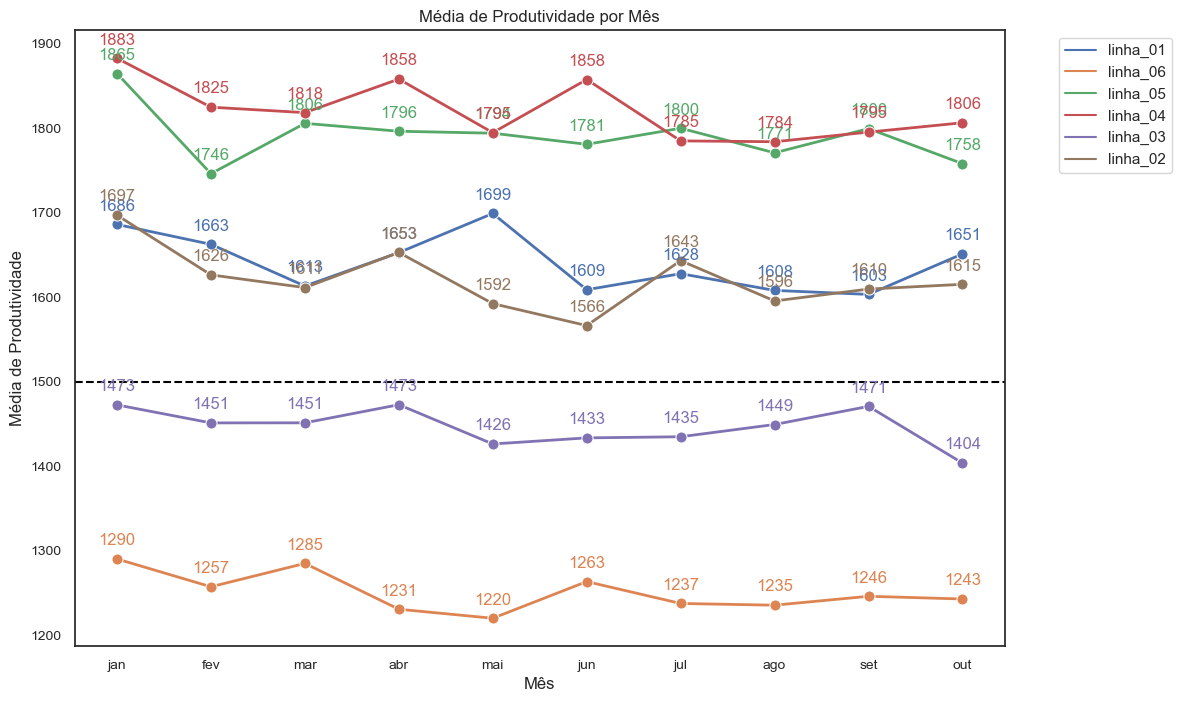

In [40]:

# Código para construção dos gráfico

import matplotlib.pyplot as plt
import seaborn as sns

def plot_line_productivity(df):
    # Calcular a média de produtividade por mês para cada linha de separação
    df_media_por_mes = df.groupby(['mes', 'linha_sep'])['produtividade'].mean().reset_index()

    # Definindo a ordem dos meses
    ordem_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']

    # Reordenar os meses de acordo com a ordem definida
    df_media_por_mes['mes'] = pd.Categorical(df_media_por_mes['mes'], categories=ordem_meses, ordered=True)
    df_media_por_mes = df_media_por_mes.sort_values(by='mes')

    # Configurar o estilo Seaborn
    sns.set(style="white")

    # Configurar o tamanho da figura
    plt.figure(figsize=(12, 8))

    # Plotar o gráfico de linhas para cada linha de separação
    sns.lineplot(data=df_media_por_mes, x='mes', y='produtividade', hue='linha_sep',\
    marker='o', markersize=8, linewidth=2, errorbar=None)

    # Adicionar uma linha horizontal para a média de 1500 peças
    plt.axhline(y=1500, color='black', linestyle='--')
    
    # Adicionar os valores em cima dos marcadores
    for linha, cor in zip(df_media_por_mes['linha_sep'].unique(), sns.color_palette()):
        df_linha = df_media_por_mes[df_media_por_mes['linha_sep'] == linha]
        for x, y in zip(df_linha['mes'], df_linha['produtividade']):
            plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 10),
                         ha='center', fontsize=12, color=cor)

    # Adicionar rótulos e título com tamanho de letra aumentado
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Média de Produtividade', fontsize=12)
    plt.title('Média de Produtividade por Mês', fontsize=12)

    # Ajustar tamanho da fonte das marcações no eixo x e y
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adicionar a legenda fora do gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Exibir o gráfico
    plt.show()

# Chamar a função
plot_line_productivity(dfprod)



**Análise do Gráfico de Linhas - Produtividade**

As linhas que estão abaixo da meta aceitável de 1.500 peças por hora, são a Linha 03 e Linha 06.

# <font color='blue'>Respondendo às Perguntas de Negócios- Fase 02</font>


<br> 
<div style="text-align: justify">
Após a conclusão da primeira etapa da análise descritiva do dataframe, identificamos que duas linhas de separação, especificamente a linha 03 e a linha 06, estão operando abaixo da meta mínima estabelecida de 1.500 peças separadas por hora.
</div><br>
Diante desse cenário, é crucial avançar para uma análise mais detalhada dessas linhas específicas, visando compreender as razões subjacentes à baixa produtividade.
</div><br>

**Compreendendo os Dados Logísticos - Separação de Peças por Hora. Linha 03 e linha 06**

In [20]:
#Criação de um novo dataframe somente com os dados da linha 03 e linha 06  que estão abaixo da meta
linhas_selecionadas = ['linha_03', 'linha_06']
df_linhas_selecionadas = dfprod[dfprod['linha_sep'].isin(linhas_selecionadas)]



### 06-  Qual é a distribuição da separação de peças por hora da Linha 03 e Linha 06?
#### A- Gráfico  do Histograma - Linha 03 e Linha 06.

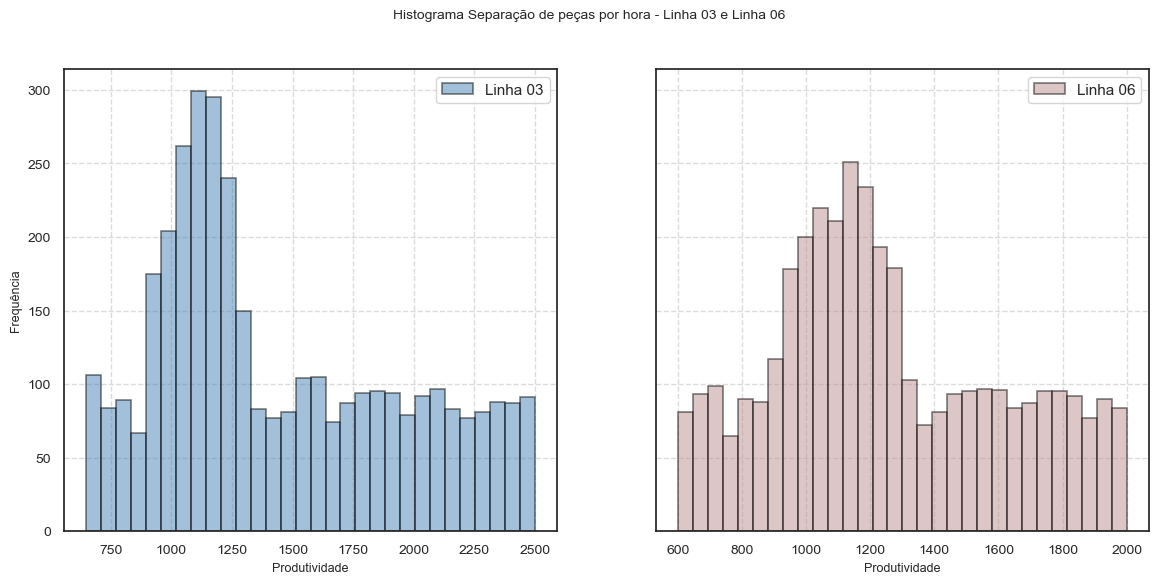

In [41]:
# Código para criação dos gráfcos de Histograma Linha 03 e linha 06


import matplotlib.pyplot as plt
import pandas as pd

def plot_histogram(df):
    # Selecione os dados relevantes para as linhas 03 e 06
    dados_linha_03 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_03']['produtividade']
    dados_linha_06 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_06']['produtividade']

    # Configurar o tamanho da figura
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Criar os histogramas lado a lado com bordas pretas
    axs[0].hist(dados_linha_03, bins=30, alpha=0.5, color='steelblue', edgecolor='black', linewidth=1.2, label='Linha 03')
    axs[1].hist(dados_linha_06, bins=30, alpha=0.5, color='rosybrown', edgecolor='black', linewidth=1.2, label='Linha 06')

    # Adicionar rótulos e título
    fig.suptitle('Histograma Separação de peças por hora - Linha 03 e Linha 06', fontsize=10)
    axs[0].set_xlabel('Produtividade', fontsize=9)
    axs[1].set_xlabel('Produtividade', fontsize=9)
    axs[0].set_ylabel('Frequência', fontsize=9)

    # Configurar a fonte dos ticks
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='x', labelrotation=0)  # Ajuste para a rotação dos rótulos do eixo x

    # Adicionar legenda
    axs[0].legend()
    axs[1].legend()

    # Adicionar uma grade
    for ax in axs:
        ax.grid(True, linestyle='--', alpha=0.7)

    # Exibir o gráfico
    plt.show()

# Chamar a função
plot_histogram(df_linhas_selecionadas)


**B- Gráfico do Bloxplot - Linha 02 e Linha 06.**

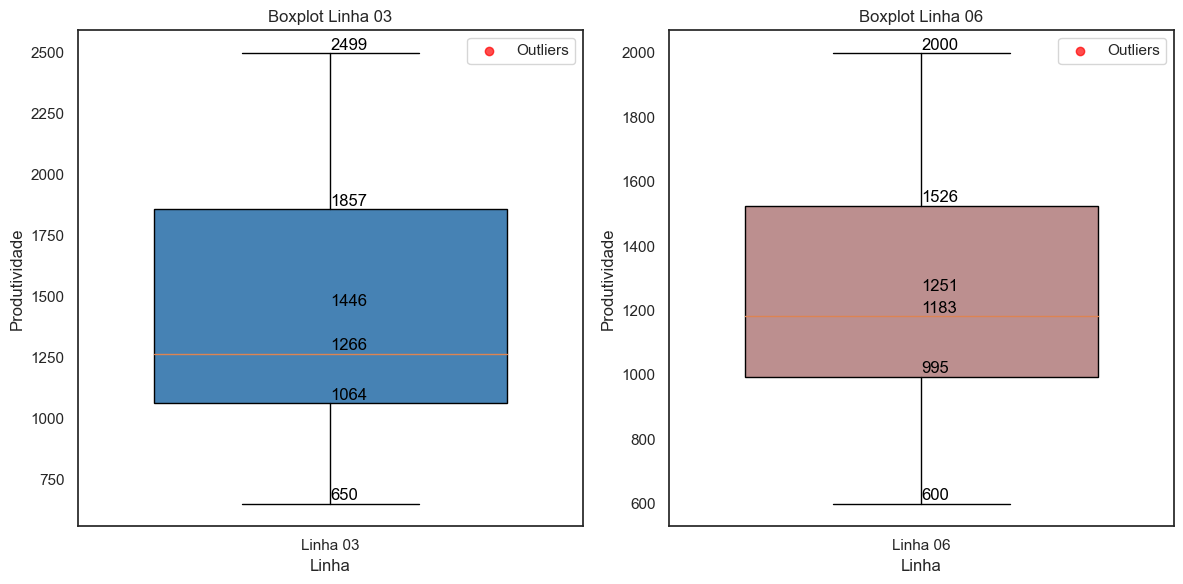

In [42]:
# Código para criação dos gráfcos de BloxPlot Linha 03 e linha 06

import matplotlib.pyplot as plt
import pandas as pd

def plot_boxplots(df_linhas_selecionadas):
    # Selecione os dados relevantes para as linhas 03 e 06
    dados_linha_03 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_03']['produtividade']
    dados_linha_06 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_06']['produtividade']

    # Calcular estatísticas descritivas para as linhas
    estatisticas_linha_03 = dados_linha_03.describe()
    estatisticas_linha_06 = dados_linha_06.describe()

    # Configurar o tamanho da figura
    plt.figure(figsize=(12, 6))

    # Criar o primeiro subplot para a Linha 03
    plt.subplot(1, 2, 1)
    bp_03 = plt.boxplot([dados_linha_03], labels=['Linha 03'], patch_artist=True, widths=0.7)

    # Adicionar rótulos e título
    plt.title('Boxplot Linha 03')
    plt.xlabel('Linha')
    plt.ylabel('Produtividade')

    # Definir a cor desejada para as caixas internas
    for patch, color in zip(bp_03['boxes'], ['steelblue']):
        patch.set_facecolor(color)

    # Adicionar valores acima das linhas
    for stat in ['min', 'mean', '50%', '25%', '75%', 'max']:
        plt.text(1, estatisticas_linha_03[stat] + 1, f'{estatisticas_linha_03[stat]:.0f}',\
        color='black', ha='left', va='bottom')

    # Adicionar outliers se houver
    outliers_03 = bp_03['fliers'][0].get_ydata()
    plt.scatter([1] * len(outliers_03), outliers_03, marker='o', color='red', alpha=0.7, label='Outliers')

    # Adicionar legenda
    plt.legend()

    # Criar o segundo subplot para a Linha 06
    plt.subplot(1, 2, 2)
    bp_06 = plt.boxplot([dados_linha_06], labels=['Linha 06'], patch_artist=True, widths=0.7)

    # Adicionar rótulos e título
    plt.title('Boxplot Linha 06')
    plt.xlabel('Linha')
    plt.ylabel('Produtividade')

    # Definir a cor desejada para as caixas internas
    for patch, color in zip(bp_06['boxes'], ['rosybrown']):
        patch.set_facecolor(color)

    # Adicionar valores acima das linhas
    for stat in ['min', 'mean', '50%', '25%', '75%', 'max']:
        plt.text(1, estatisticas_linha_06[stat] + 1, f'{estatisticas_linha_06[stat]:.0f}',\
        color='black', ha='left', va='bottom')

    # Adicionar outliers se houver
    outliers_06 = bp_06['fliers'][0].get_ydata()
    plt.scatter([1] * len(outliers_06), outliers_06, marker='o', color='red', alpha=0.7, label='Outliers')

    # Adicionar legenda
    plt.legend()

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

# Chamar a função
plot_boxplots(df_linhas_selecionadas)


**Análise dos resultados do Boxplot da Linha 03 e Linha 06**

**Mínimo Linha 03 = (650 peças) e Linha 06 = (600 peças):** O valor mínimo de 600 peças por hora representa a produção mais baixa registrada em uma hora para uma categoria de produtos na linha 03. Da mesma forma, o valor mínimo de 650 peças por hora representa a produção mais baixa registrada em uma hora para uma categoria na linha 06.

**1º Quartil (Q1 Linha 03 = 1.064) e (Q1 Linha 06 - 995):** O primeiro quartil indica que 25% da produtividade da linha 03 está abaixo de 1.064 peças e da linha 06 está abaixo de 995 peças.

**Mediana (Q2 Linha 03 = 1.266) e (Q2 Linha 06 = 1.183):** A mediana, ou segundo quartil, é o valor que divide a distribuição ao meio. No caso da linha 03, ela indica que 50% da produtividade está está acima de 1.266 peças e a outra metade está abaixo. E no caso da linha 06 temos que 50% da produtividade acima 1.183 peças e outra metada abaixo.

**Média**: Representa a média das peças separadas por hora para todas as categorias de produtos. Na linha 03 é 1.446 peças por hora e da Linha 06 de 1.251 peças por hora.

**3º Quartil (Q3 - Linha 03 - 1.857) e (Q3 - Linha 06 - 1.526):** O terceiro quartil mostra que 75% da produtividade, separação da linha 03, está abaixo de 1.857 peças por hora e da Linha 06 abaixo de 1.526.

**Máximo:** O valor máximo de 2.499 peças por hora da linha 03 e o valor máximo de 2.000 peças por hora da linha 06, representam a produção mais alta para cada linha registrada em uma hora para uma categoria de produtos no período analisado.


### 07- Existe uma variação na separação de peças por hora por turno de trabalho na linha 03 e linha 06?

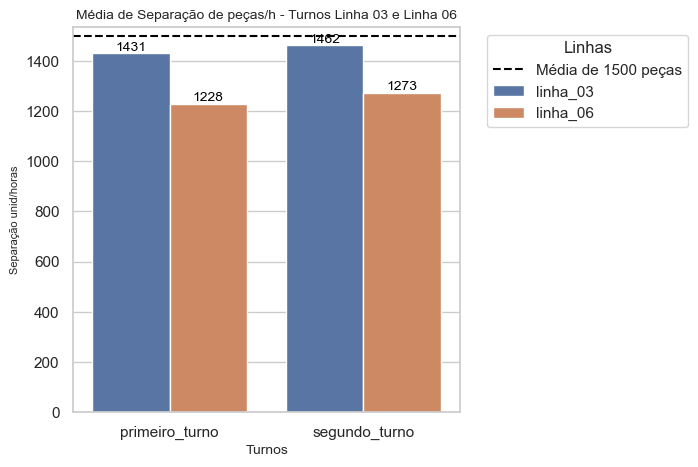

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_media_separacao_turno(df):
    # Definir o estilo Seaborn como "whitegrid"
    sns.set(style="whitegrid")

    # Filtrar apenas as linhas 03 e 06
    linhas_selecionadas = ['linha_03', 'linha_06']
    df_linhas_03_06 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'].isin(linhas_selecionadas)].copy()

    # Calcular a média da produtividade por turno
    df_media_turno = df_linhas_03_06.groupby(['linha_sep', 'turno_sep'])['produtividade'].mean().reset_index()

    # Criar o gráfico de barras com tamanho ajustado usando Seaborn
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x="turno_sep", y="produtividade", hue="linha_sep", data=df_media_turno)

    # Adicionar uma linha horizontal para a média de 1500 peças
    plt.axhline(y=1500, color='black', linestyle='--', label='Média de 1500 peças')

    # Adicionar os valores no topo das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', color='black', fontsize=10)

    # Adicionar bordas
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    # Adicionar rótulos e título com tamanho de letra aumentado
    plt.xlabel('Turnos', fontsize=10)
    plt.ylabel('Separação unid/horas', fontsize=8)
    plt.title('Média de Separação de peças/h - Turnos Linha 03 e Linha 06', fontsize=10)

    # Posicionar a legenda ao lado
    plt.legend(title='Linhas', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar o gráfico
    plt.show()

# Chamar a função
plot_media_separacao_turno(df_linhas_selecionadas)


### 08- Existem horas específicas com maior ou menor separação de peças por hora na linha 03 e linha 06?
### 09- Existe significativas na variação de peças separadas por hora ao longo dos meses na linha 03 e linha 06?


In [24]:
# Código para criar Novo daframe com dodos de hora, mes e média de produtividade
df_linha_03 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] ==\
'linha_03'].groupby(['mes', 'hora_sep'])['produtividade'].mean().reset_index()

In [25]:
# Código para criar Novo daframe com dodos de hora, mes e média de produtividade
df_linha_06 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] ==\
'linha_06'].groupby(['mes', 'hora_sep'])['produtividade'].mean().reset_index()

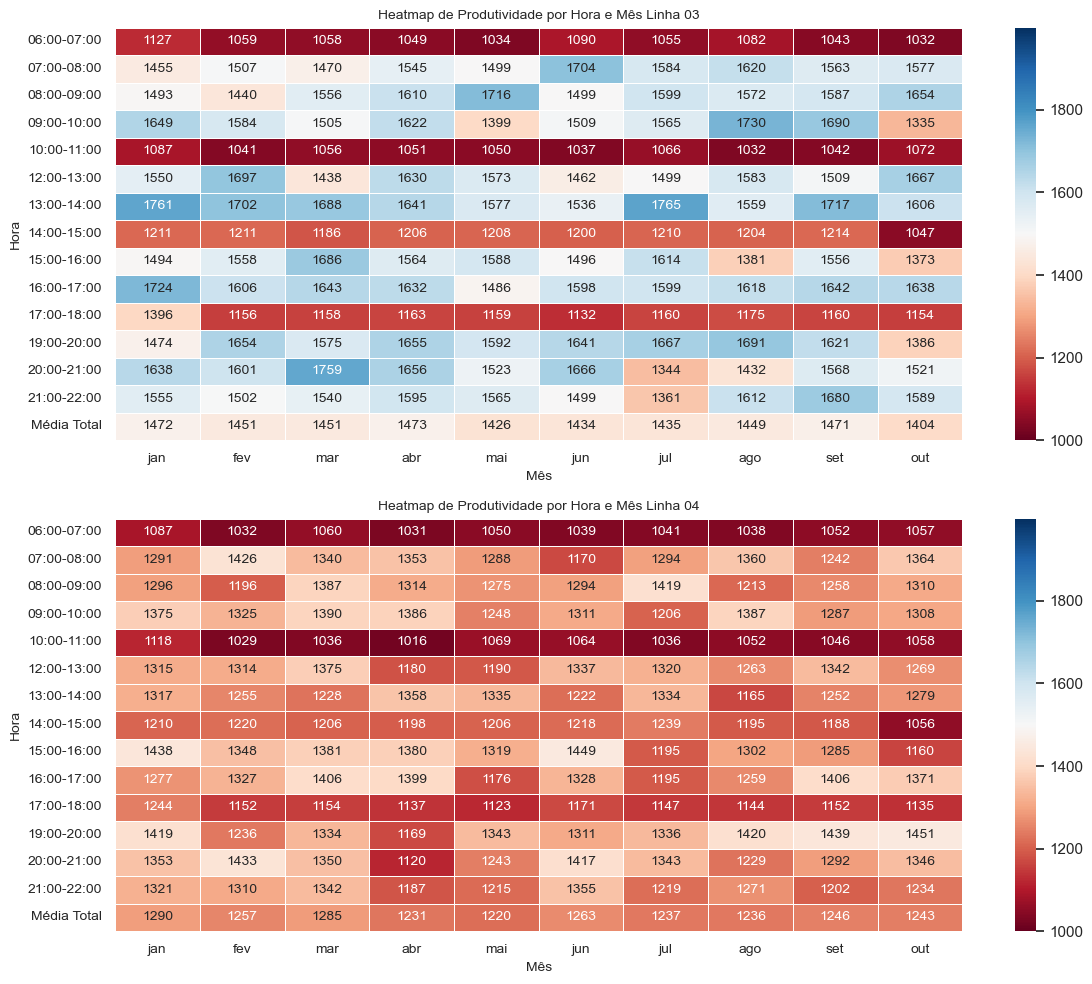

In [35]:

# Código para criar o Heatmap da produtividade da linha 03 e linha 06

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmaps(dataframe1, dataframe2):
    # Definindo a ordem dos meses
    ordem_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']
    
    # Criar uma figura com uma grade de 2 linhas e 1 coluna
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # Iterar sobre cada dataframe e plotar o heatmap correspondente
    for i, dataframe in enumerate([dataframe1, dataframe2]):
        # Criar uma tabela pivô para preparar os dados para o mapa de calor
        heatmap_data = dataframe.pivot(index='hora_sep', columns='mes', values='produtividade')

        # Reordenar as colunas de acordo com a ordem dos meses
        heatmap_data = heatmap_data.reindex(columns=ordem_meses)

        # Preencher os valores não finitos com zero
        heatmap_data = heatmap_data.fillna(0)

        # Arredondar e converter para inteiros
        heatmap_data = heatmap_data.round().astype('int')

        # Calcular a média total de cada coluna
        media_total = heatmap_data.mean()

        # Adicionar a média total ao final de cada coluna
        heatmap_data.loc['Média Total'] = media_total

        # Criar o heatmap com cores personalizadas
        sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt=".0f", linewidths=.5, annot_kws={"fontsize":10},
                    vmin=1000, vmax=1999, ax=axs[i])

        # Adicionar rótulos e título com tamanho de letra aumentado
        axs[i].set_xlabel('Mês', fontsize=10)
        axs[i].set_ylabel('Hora', fontsize=10)
        axs[i].set_title(f'Heatmap de Produtividade por Hora e Mês Linha 0{i+3}', fontsize=10)

        # Ajustar tamanho da fonte das marcações no eixo x e y
        axs[i].tick_params(axis='x', labelsize=10)
        axs[i].tick_params(axis='y', labelsize=10)

    plt.tight_layout()
    plt.show()

# Chamar a função
plot_heatmaps(df_linha_03, df_linha_06)


**Análise do Heatmap - Linha 03**

Durante o início do turno, das **06:00 às 07:00**, a produtividade é muito baixa, mas logo há um aumento das **07:00 às 08:00**. Entre as **07:00 e 10:00**, a produtividade se mantém relativamente consistente, embora em alguns momentos esteja abaixo da meta aceitável de 1500 peças por hora. 

Por volta das **10:00 e 11:00**, ocorre uma queda acentuada na produtividade. No período das **14:00 às 15:00**, há novamente uma baixa na produtividade. Das **15:00 às 17:00**, a produtividade é relativamente consistente, mas das **17:00 às 18:00**, há um declínio acentuado. Por fim, das **19:00 às 22:00**, a produtividade se mantém estável, indicando uma produção regular nessa parte do turno.

**Análise dos Meses - Produtividade**

Ao analisarmos a média de peças separadas por hora para cada mês, constata-se que a linha 03 apresenta uma média mensal abaixo da meta mínima aceitável de 1500 peças separadas por hora.

**Análise do Heatmap - Linha 06**

A Linha 06 segue a tendência da linha 03 referente aos picos de produtividade, entretanto com todos os valores ao longo do ano, de Janeiro a Outubro, bem abaixo da meta mínima aceitável de 1500 peças separadas por hora, a linha 06 apresenta uma situação crítica.

Ao analisarmos a média de peças separadas por hora para cada mês, constata-se que a linha 03 apresenta uma média mensal abaixo da meta mínima aceitável de 1500 peças separadas por hora

## 10- Entrega da Análise Descritiva para o Tomador de Decisão


Abaixo uma análise detalhada da produtividade das 06 linhas de separação ao longo do período de Janeiro a Outubro de 2023. Esta análise é crucial para compreendermos melhor o desempenho de cada linha e identificar áreas de melhoria potencial.

Após a primeira análise ocorre a análise das duas linhas que foram indentificadas abaixo da meta miníma de 1500 peças.


### Fase 01 - Análise das seis linhas de separação


**Distribuição de Produção:**

Os dados indicam que a produção das 06 linhas de separação varia entre 600 e 3000 peças por hora, com uma média de 1595 peças por hora.


**No 1º Turno (06:00 às 14:00):**

Há uma baixa produtividade no início do turno, com um aumento significativo entre **07:00 e 08:00**, alcançando um pico de 1778 peças por hora.

**Entre 07:00 e 10:00**, a produtividade permanece relativamente estável em torno de 1770 peças por hora. Contudo, observa-se uma queda acentuada na produtividade entre **10:00 e 11:00**, com uma média de 1051 peças por hora.


**No 2º Turno (14:00 às 22:00):**

Novamente, há uma produtividade baixa entre **14:00 e 15:00**, no início do turno, com um aumento notável entre **15:00 e 16:00**, atingindo um pico de 1775 peças por hora.

**Entre 15:00 e 17:00**, a produtividade mantém-se consistente em torno de 1782 peças por hora. Entretanto, entre **17:00 e 18:00**, observa-se uma queda acentuada na produtividade para 1051 peças por hora.


**Análise de Tendências Mensais:**

A média de separação de peças por hora ao longo dos meses revela uma tendência de estabilidade, com variações moderadas em torno de um valor médio de 1591 peças por hora. Não há uma tendência clara de aumento ou diminuição durante o período considerado, com médias mensais variando entre **1565 e 1649** peças por hora.

**Desempenho das Linhas:**

Identificamos que as **linhas 03 e 06** estão consistentemente abaixo da meta aceitável de 1500 peças por hora, exigindo atenção especial para melhorias.


### Fase 02 - Análise das linhas 03 e 06  de separação.


Após uma análise cuidadosa do desempenho das seis linhas de produção ao longo do período de Janeiro a Outubro de 2023, os dados indicam que as Linhas 03 e 06, estão operando abaixo da meta mínima estabelecida de 1500 peças separadas por hora.

**Desempenho das Linhas 03 e 06:**

**Linha 03:** A produção mínima registrada foi de 650 peças por hora, com uma média de 1446 peças por hora e uma produção máxima de 2499 peças por hora.

**Linha 06:**  Registrou uma produção mínima de 600 peças por hora, com uma média de 1251 peças por hora e uma produção máxima de 2000 peças por hora.

**Análise de Tendências Horárias - Linha 03**

Observamos que a produtividade da Linha 03 varia ao longo do dia, com momentos de aumento e queda. Embora tenhamos períodos de estabilidade, como entre **07:00 e 10:00**, ainda enfrenta desafios para atingir a meta estabelecida.

**Análise de Tendências Horárias - Linha 06:**

A Linha 06 segue um padrão semelhante à Linha 03, com todos os valores registrados abaixo da meta mínima. Isso indica uma situação crítica que precisa ser abordada com urgência.

**Análise dos Meses - Produtividade:**

Ao analisarmos a média de peças separadas por hora para cada mês, constatamos que tanto a Linha 03 quanto a Linha 06 apresentam uma média mensal abaixo da meta mínima aceitável de 1500 peças separadas por hora.

**Conclusão:**

Diante desses resultados, é crucial que avancemos para uma análise mais detalhada das Linhas 03 e 06, a fim de identificar as causas subjacentes à baixa produtividade e implementar medidas corretivas eficazes. Estamos à disposição para discutir estratégias adicionais e colaborar na busca por soluções para melhorar o desempenho das linhas de produção.

**Recomendações:**

* Identificar fontes específicas de baixa produtividade da linha 03 e 06.
* Implementar estratégias para atingir e superar as metas estabelecidas.
* Focar em áreas com oportunidades estratégicas para aumentar a eficiência.



In [27]:
# Versões dos pacotes usados neste jupyter notebook.
%reload_ext watermark
%watermark -a "Marcus lopes" 

Author: Marcus lopes

